# Bike Sharing

***

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|instant |	record index|
|dteday |date	|
|season |season (1:spring, 2:summer, 3:fall, 4:winter)	|
|yr |year (0: 2011, 1:2012)	|
|mnth |month ( 1 to 12)	|
|hr |hour (0 to 23)	|
|holiday |wheather day is holiday or not	|
|weekday |day of the week	|
|workingday |if day is neither weekend nor holiday is 1, otherwise is 0	|
|weathersit |1: Clear, 	2: Mist + Cloudy, 3: Light Snow, Light Rain, 4: Heavy Rain + Ice Pallets|
|temp |Normalized temperature in Celsius	|
|atemp |Normalized feeling temperature in Celsius	|
|hum |Normalized humidity	|
|windspeed |Normalized wind speed	|
|casual |count of casual users	|
|registered |count of registered users	|
|cnt |count of total rental bikes including both casual and registered	|


## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("day2012.csv", parse_dates=['dteday'])

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,366,2012-01-01,1,1,1,0,0,0,1,0.37,0.38,0.69,0.19,686,1608,2294
1,367,2012-02-01,1,1,1,1,1,0,1,0.27,0.25,0.38,0.33,244,1707,1951
2,368,2012-03-01,1,1,1,0,2,1,1,0.15,0.13,0.44,0.37,89,2147,2236
3,369,2012-04-01,1,1,1,0,3,1,2,0.11,0.12,0.41,0.18,95,2273,2368
4,370,2012-05-01,1,1,1,0,4,1,1,0.27,0.28,0.52,0.13,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,727,2012-12-27,1,1,12,0,4,1,2,0.25,0.23,0.65,0.35,247,1867,2114
362,728,2012-12-28,1,1,12,0,5,1,2,0.25,0.26,0.59,0.16,644,2451,3095
363,729,2012-12-29,1,1,12,0,6,0,2,0.25,0.24,0.75,0.12,159,1182,1341
364,730,2012-12-30,1,1,12,0,0,0,1,0.26,0.23,0.48,0.35,364,1432,1796


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     366 non-null    int64         
 1   dteday      366 non-null    datetime64[ns]
 2   season      366 non-null    int64         
 3   yr          366 non-null    int64         
 4   mnth        366 non-null    int64         
 5   holiday     366 non-null    int64         
 6   weekday     366 non-null    int64         
 7   workingday  366 non-null    int64         
 8   weathersit  366 non-null    int64         
 9   temp        366 non-null    float64       
 10  atemp       366 non-null    float64       
 11  hum         366 non-null    float64       
 12  windspeed   366 non-null    float64       
 13  casual      366 non-null    int64         
 14  registered  366 non-null    int64         
 15  cnt         366 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,366.00,366,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00
unique,NaN,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,548.50,NaN,2.49,1.00,6.51,0.03,2.99,0.68,1.37,0.50,0.48,0.61,0.19,1018.48,4581.45,5599.93
std,105.80,NaN,1.11,0.00,3.46,0.17,2.01,0.47,0.52,0.18,0.16,0.13,0.08,758.99,1424.33,1788.67
min,366.00,NaN,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.11,0.10,0.25,0.05,2.00,20.00,22.00
25%,457.25,NaN,2.00,1.00,4.00,0.00,1.00,0.00,1.00,0.35,0.35,0.51,0.13,429.75,3730.50,4369.00


In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

## Data Preprocessing

### Drop unwanted features

In [7]:
df.drop(['instant','yr','weekday','atemp'], axis=1, inplace=True)

In [8]:
df

,dteday,season,mnth,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2012-01-01,1,1,0,0,1,0.37,0.69,0.19,686,1608,2294
1,2012-02-01,1,1,1,0,1,0.27,0.38,0.33,244,1707,1951
2,2012-03-01,1,1,0,1,1,0.15,0.44,0.37,89,2147,2236
3,2012-04-01,1,1,0,1,2,0.11,0.41,0.18,95,2273,2368
4,2012-05-01,1,1,0,1,1,0.27,0.52,0.13,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,1,12,0,1,2,0.25,0.65,0.35,247,1867,2114
362,2012-12-28,1,12,0,1,2,0.25,0.59,0.16,644,2451,3095
363,2012-12-29,1,12,0,0,2,0.25,0.75,0.12,159,1182,1341
364,2012-12-30,1,12,0,0,1,0.26,0.48,0.35,364,1432,1796


### Treat Missing Values

In [9]:
df.isnull().sum()

dteday        0
season        0
mnth          0
holiday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Treat Duplicate Values

In [10]:
df.duplicated(keep='first').sum()

0

### Load processed file

In [11]:
df = pd.read_csv("train.csv", parse_dates=['dteday'])

In [12]:
df

,dteday,season,mnth,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2012-01-01,1,1,0,0,1,0.37,0.69,0.19,686,1608,2294
1,2012-02-01,1,1,1,0,1,0.27,0.38,0.33,244,1707,1951
2,2012-03-01,1,1,0,1,1,0.15,0.44,0.37,89,2147,2236
3,2012-04-01,1,1,0,1,2,0.11,0.41,0.18,95,2273,2368
4,2012-05-01,1,1,0,1,1,0.27,0.52,0.13,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,1,12,0,1,2,0.25,0.65,0.35,247,1867,2114
362,2012-12-28,1,12,0,1,2,0.25,0.59,0.16,644,2451,3095
363,2012-12-29,1,12,0,0,2,0.25,0.75,0.12,159,1182,1341
364,2012-12-30,1,12,0,0,1,0.26,0.48,0.35,364,1432,1796


### Type Change

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      366 non-null    datetime64[ns]
 1   season      366 non-null    int64         
 2   mnth        366 non-null    int64         
 3   holiday     366 non-null    int64         
 4   workingday  366 non-null    int64         
 5   weathersit  366 non-null    int64         
 6   temp        366 non-null    float64       
 7   hum         366 non-null    float64       
 8   windspeed   366 non-null    float64       
 9   casual      366 non-null    int64         
 10  registered  366 non-null    int64         
 11  cnt         366 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 34.4 KB


In [14]:
df["season"] = df["season"].astype('category')

In [15]:
df["holiday"] = df["holiday"].astype('category')

In [16]:
df["workingday"] = df["workingday"].astype('category')

In [17]:
df["weathersit"] = df["weathersit"].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      366 non-null    datetime64[ns]
 1   season      366 non-null    category      
 2   mnth        366 non-null    int64         
 3   holiday     366 non-null    category      
 4   workingday  366 non-null    category      
 5   weathersit  366 non-null    category      
 6   temp        366 non-null    float64       
 7   hum         366 non-null    float64       
 8   windspeed   366 non-null    float64       
 9   casual      366 non-null    int64         
 10  registered  366 non-null    int64         
 11  cnt         366 non-null    int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 25.0 KB


In [19]:
df.describe(include='all')

,dteday,season,mnth,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,366,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00,366.00
unique,366,4.00,NaN,2.00,2.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-01-01 00:00:00,3.00,NaN,0.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,94.00,NaN,355.00,250.00,237.00,NaN,NaN,NaN,NaN,NaN,NaN
first,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.51,NaN,NaN,NaN,0.50,0.61,0.19,1018.48,4581.45,5599.93
std,NaN,NaN,3.46,NaN,NaN,NaN,0.18,0.13,0.08,758.99,1424.33,1788.67
min,NaN,NaN,1.00,NaN,NaN,NaN,0.11,0.25,0.05,2.00,20.00,22.00
25%,NaN,NaN,4.00,NaN,NaN,NaN,0.35,0.51,0.13,429.75,3730.50,4369.00


### One-hot encoding

In [20]:
pd.get_dummies(df["season"], drop_first=True).head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [21]:
pd.get_dummies(df["mnth"], drop_first=True).head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [22]:
pd.get_dummies(df["weathersit"], drop_first=True).head()

,2,3
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


### Save to CSV

In [23]:
#df.to_csv("train.csv", index=False)

### Groupby Function

In [24]:
df.groupby("season")['cnt'].mean()

season
1   3531.30
2   6209.49
3   6824.24
4   5791.87
Name: cnt, dtype: float64

In [25]:
df.groupby("season")['cnt'].sum()

season
1    321348
2    571273
3    641479
4    515476
Name: cnt, dtype: int64

In [26]:
df.groupby("holiday")['cnt'].mean()

holiday
0   5637.08
1   4401.18
Name: cnt, dtype: float64

In [27]:
df.groupby("holiday")['cnt'].sum()

holiday
0    2001163
1      48413
Name: cnt, dtype: int64

In [28]:
df.groupby("workingday")['cnt'].mean()

workingday
0   5288.19
1   5744.58
Name: cnt, dtype: float64

In [29]:
df.groupby("workingday")['cnt'].sum()

workingday
0     613430
1    1436146
Name: cnt, dtype: int64

In [30]:
df.groupby("weathersit")['cnt'].mean()

weathersit
1   6003.73
2   4991.33
3   2126.17
Name: cnt, dtype: float64

In [31]:
df.groupby("weathersit")['cnt'].sum()

weathersit
1    1422885
2     613934
3      12757
Name: cnt, dtype: int64

In [32]:
df.weathersit.value_counts()

1    237
2    123
3      6
Name: weathersit, dtype: int64

## Data Visualization

### Univariate Data Exploration

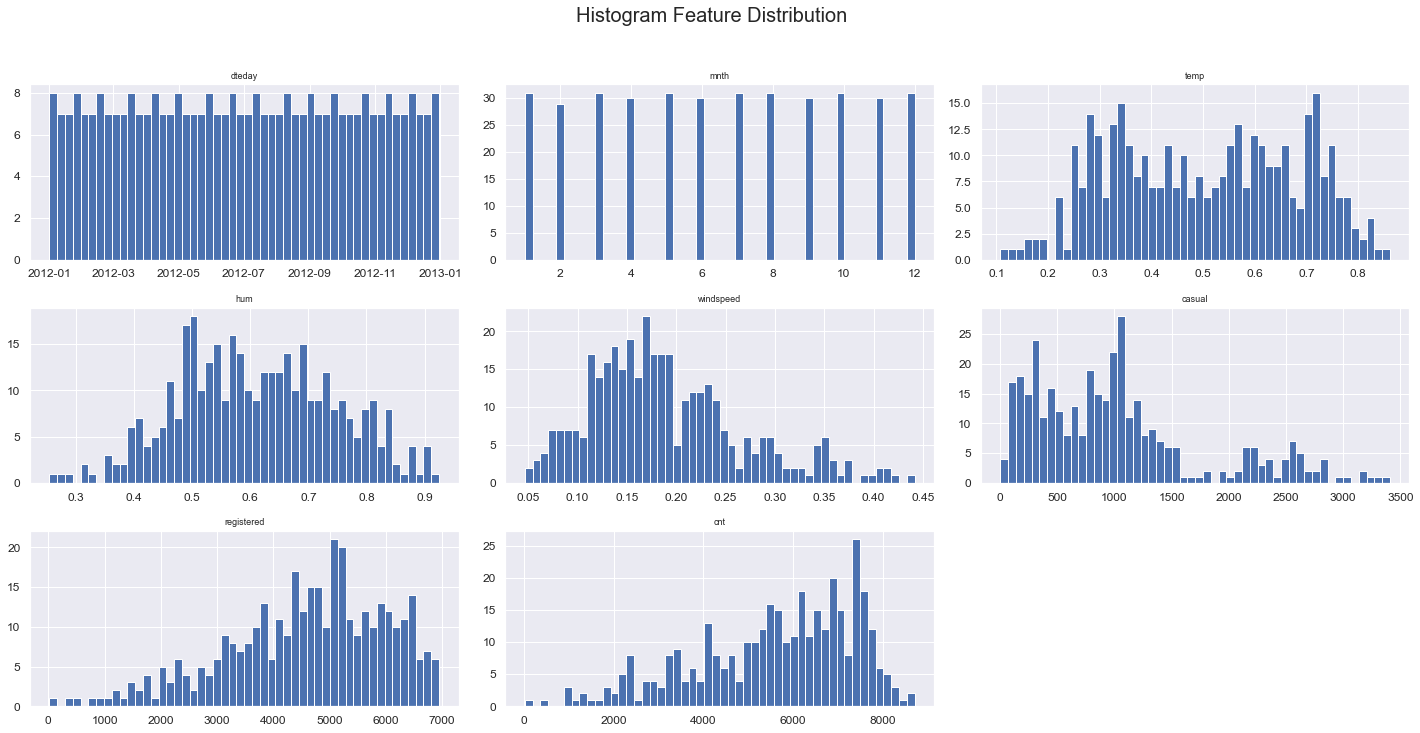

In [33]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

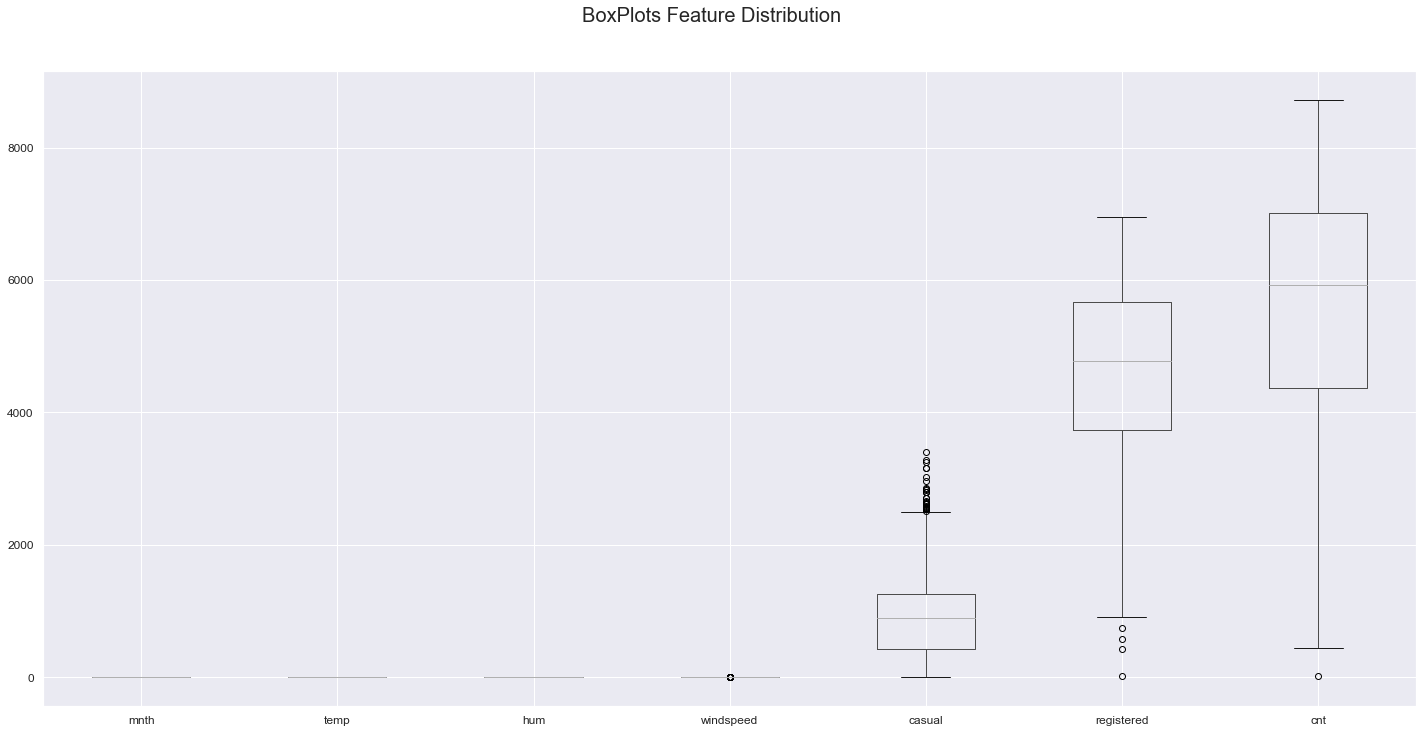

In [34]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [35]:
df2 = pd.DataFrame(df.groupby("season")['cnt'].sum())
df2

,cnt
season,
1,321348
2,571273
3,641479
4,515476


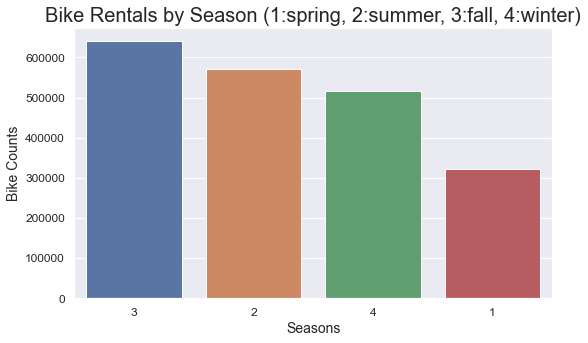

In [36]:
# Sort Barplots by Values and Single Plot

fig = plt.figure(figsize=(8,5))

sns.barplot(x=df2.index, y=df2.cnt, data=df2,
            order=df2.sort_values('cnt', ascending=False).index)
plt.title("Bike Rentals by Season (1:spring, 2:summer, 3:fall, 4:winter)", size=20)
plt.xlabel("Seasons")
plt.ylabel("Bike Counts")

plt.tight_layout()
plt.show()

In [37]:
df3 = pd.DataFrame(df.groupby("holiday")['cnt'].sum())
df3

,cnt
holiday,
0,2001163
1,48413


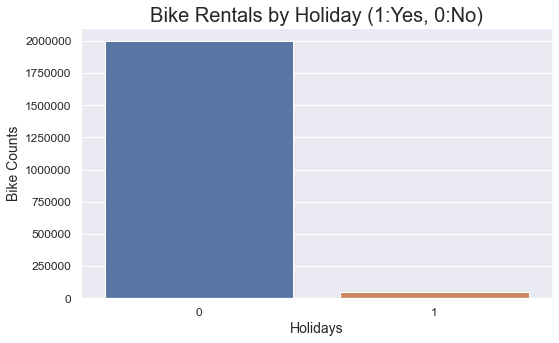

In [38]:
fig = plt.figure(figsize=(8,5))

sns.barplot(x=df3.index, y=df3.cnt, data=df3,
            order=df3.sort_values('cnt', ascending=False).index)
plt.title("Bike Rentals by Holiday (1:Yes, 0:No)", size=20)
plt.xlabel("Holidays")
plt.ylabel("Bike Counts")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [39]:
df4 = pd.DataFrame(df.groupby("workingday")['cnt'].sum())
df4

,cnt
workingday,
0,613430
1,1436146


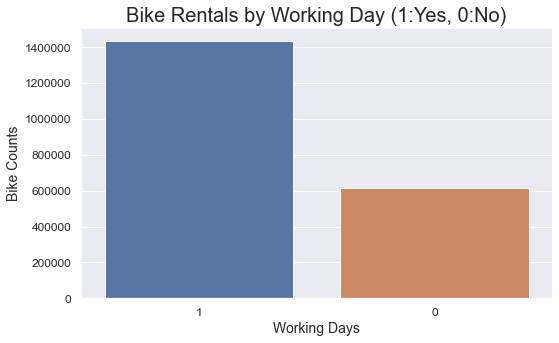

In [40]:
fig = plt.figure(figsize=(8,5))

sns.barplot(x=df4.index, y=df4.cnt, data=df4,
            order=df4.sort_values('cnt', ascending=False).index)
plt.title("Bike Rentals by Working Day (1:Yes, 0:No)", size=20)
plt.xlabel("Working Days")
plt.ylabel("Bike Counts")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [41]:
df5 = pd.DataFrame(df.groupby("weathersit")['cnt'].sum())
df5

,cnt
weathersit,
1,1422885
2,613934
3,12757


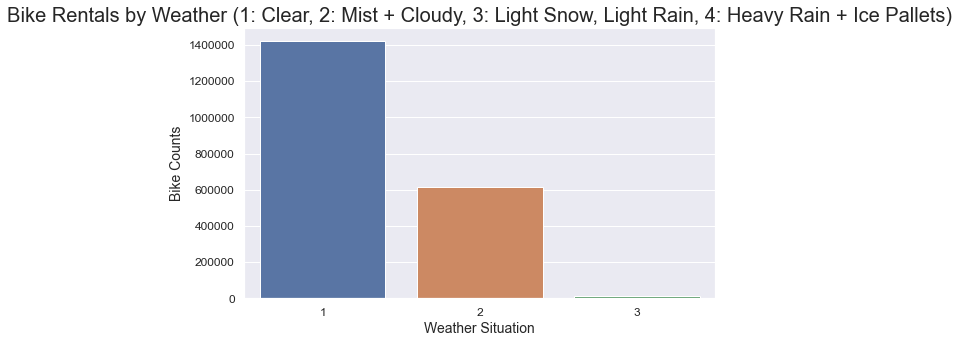

In [42]:
fig = plt.figure(figsize=(8,5))

sns.barplot(x=df5.index, y=df5.cnt, data=df5,
            order=df5.sort_values('cnt', ascending=False).index)
plt.title("Bike Rentals by Weather (1: Clear, 2: Mist + Cloudy, 3: Light Snow, Light Rain, 4: Heavy Rain + Ice Pallets)", size=20)
plt.xlabel("Weather Situation")
plt.ylabel("Bike Counts")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

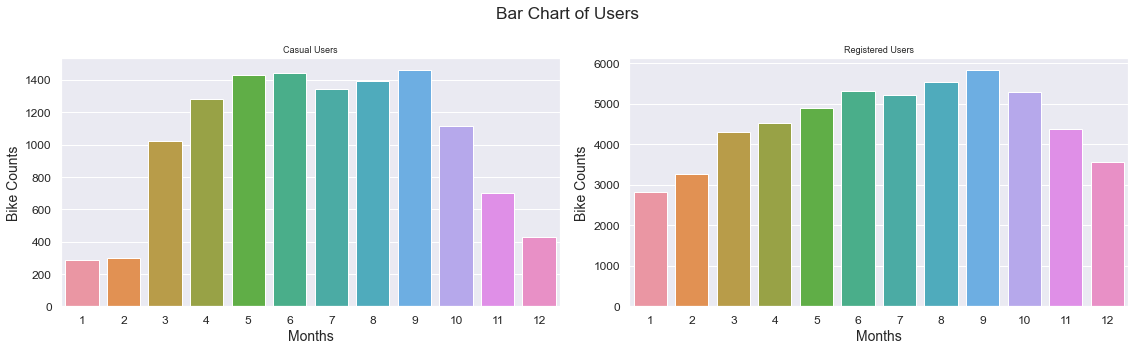

In [43]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Bar Chart of Users')

sns.barplot(x=df.mnth, y=df.casual, data=df, ax=ax[0], ci=None)
ax[0].set_title('Casual Users')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Months")
ax[0].set_ylabel("Bike Counts")

sns.barplot(x=df.mnth, y=df.registered, data=df, ax=ax[1], ci=None)
ax[1].set_title('Registered Users')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("Months")
ax[1].set_ylabel("Bike Counts")


plt.tight_layout()
plt.show()

## Regression plot

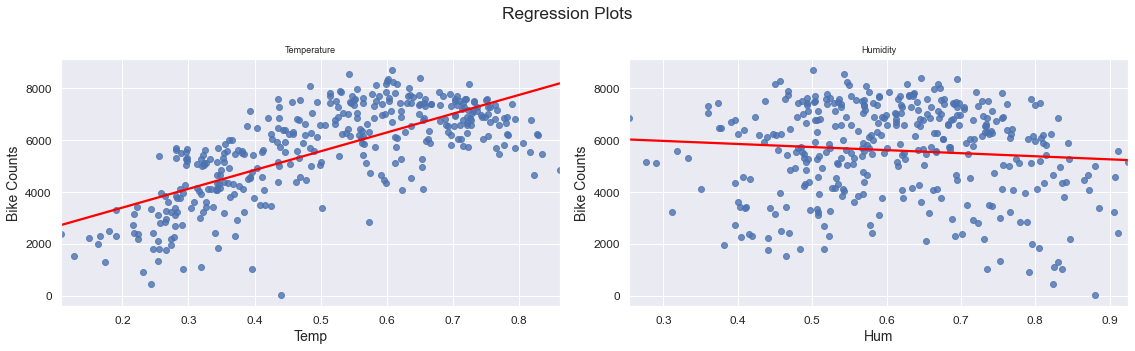

In [44]:
# Plot 1 rows and 2 columns (can be expanded)
line_color = {'color': 'red'}
fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Regression Plots')

sns.regplot(x=df.temp, y=df.cnt, data=df, ax=ax[0], ci=None, line_kws=line_color)
ax[0].set_title('Temperature')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Temp")
ax[0].set_ylabel("Bike Counts")

sns.regplot(x=df.hum, y=df.cnt, data=df, ax=ax[1], ci=None, line_kws=line_color)
ax[1].set_title('Humidity')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("Hum")
ax[1].set_ylabel("Bike Counts")


plt.tight_layout()
plt.show()

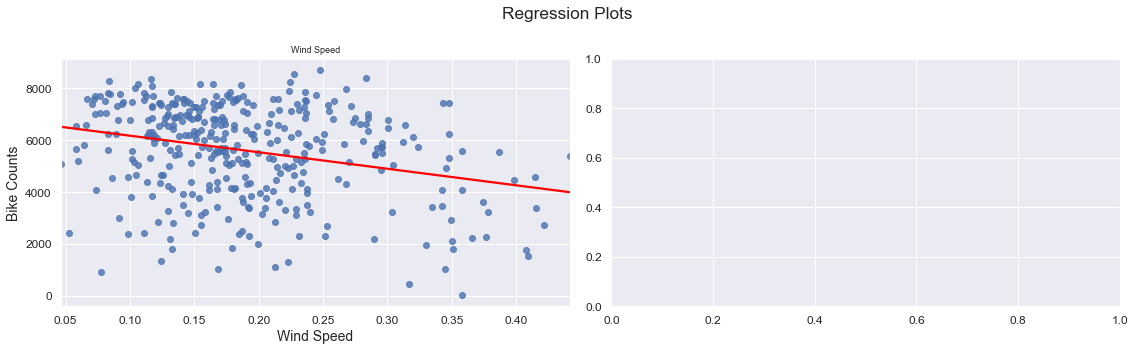

In [45]:
# Plot 1 rows and 2 columns (can be expanded)
line_color = {'color': 'red'}
fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Regression Plots')

sns.regplot(x=df.windspeed, y=df.cnt, data=df, ax=ax[0], ci=None, line_kws=line_color)
ax[0].set_title('Wind Speed')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Wind Speed")
ax[0].set_ylabel("Bike Counts")

# sns.regplot(x=df.hum, y=df.cnt, data=df, ax=ax[1], ci=None, line_kws=line_color)
# ax[1].set_title('Humidity')
# #ax[1].tick_params('x', labelrotation=45)
# ax[1].set_xlabel("Hum")
# ax[1].set_ylabel("Bike Counts")


plt.tight_layout()
plt.show()

### CatPlots

<Figure size 2160x1440 with 0 Axes>

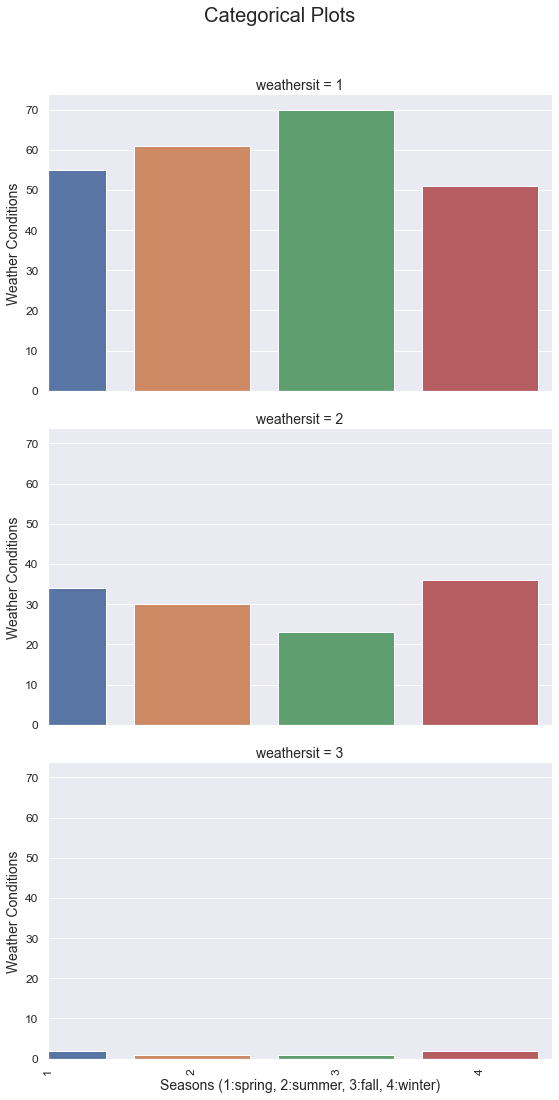

In [46]:
plt.figure(figsize=(30,20))


g = sns.catplot(x='season', row = 'weathersit', 
            kind='count', data=df,
            height = 5, aspect = 1.6)

g.set_xlabels("Seasons (1:spring, 2:summer, 3:fall, 4:winter)")
g.set_ylabels("Weather Conditions")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('Categorical Plots', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

## Time-Series Analysis

In [47]:
df.head()

,dteday,season,mnth,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2012-01-01,1,1,0,0,1,0.37,0.69,0.19,686,1608,2294
1,2012-02-01,1,1,1,0,1,0.27,0.38,0.33,244,1707,1951
2,2012-03-01,1,1,0,1,1,0.15,0.44,0.37,89,2147,2236
3,2012-04-01,1,1,0,1,2,0.11,0.41,0.18,95,2273,2368
4,2012-05-01,1,1,0,1,1,0.27,0.52,0.13,140,3132,3272


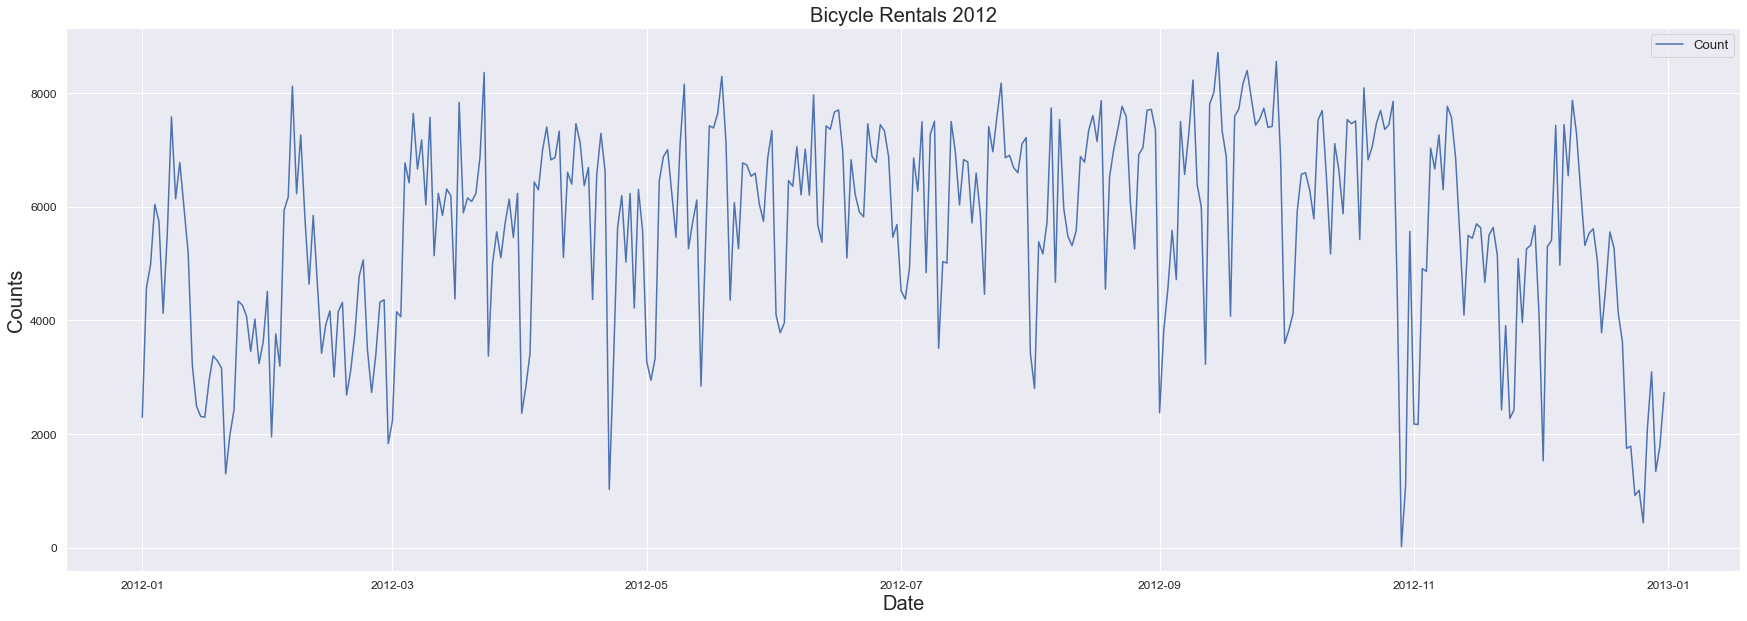

In [48]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.dteday, y=df.cnt, data=df, estimator=None)
plt.title("Bicycle Rentals 2012", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.legend(['Count'])
plt.show()

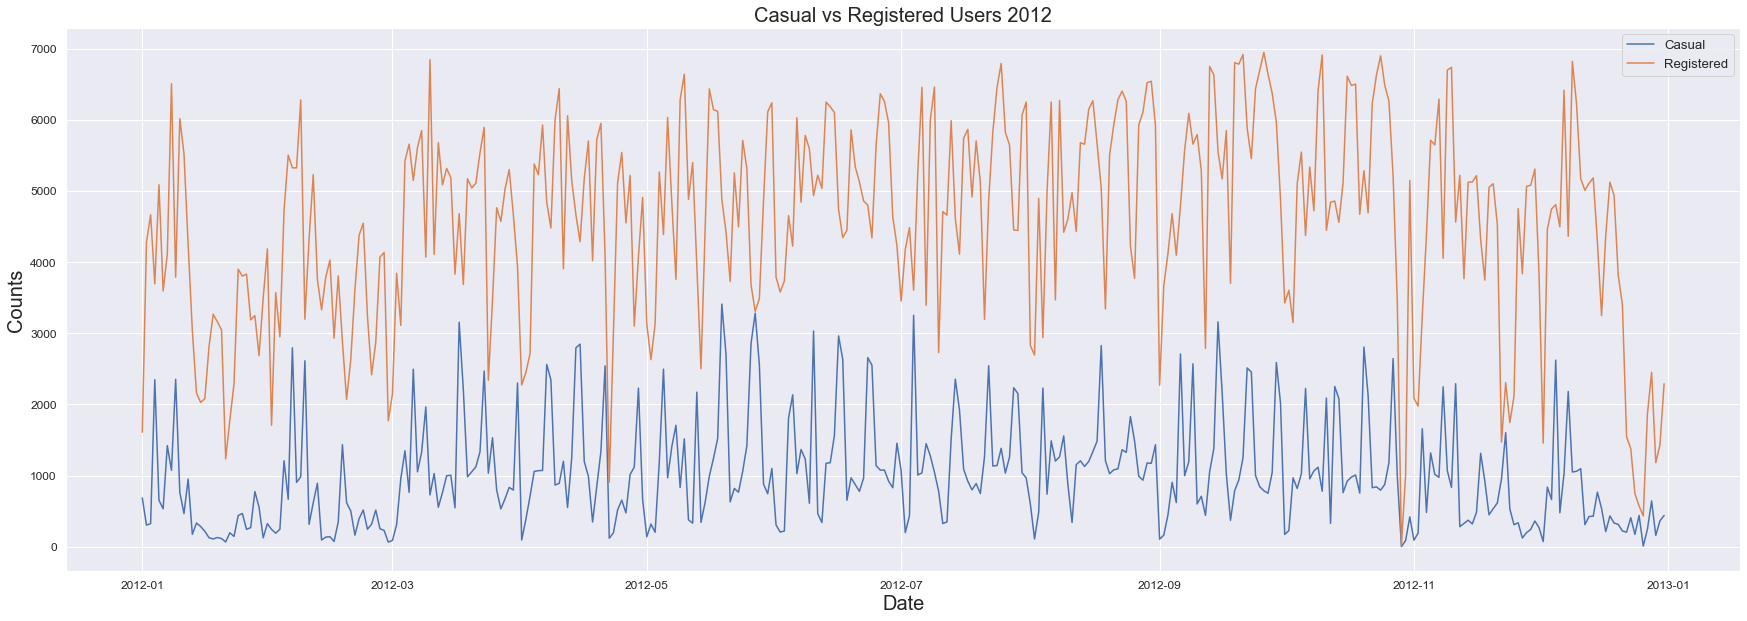

In [49]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.dteday, y=df.casual, data=df, estimator=None)
sns.lineplot(x=df.dteday, y=df.registered, data=df, estimator=None)
plt.title("Casual vs Registered Users 2012", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.legend(['Casual','Registered'])
plt.show()

## Pairplots

<Figure size 1440x1440 with 0 Axes>

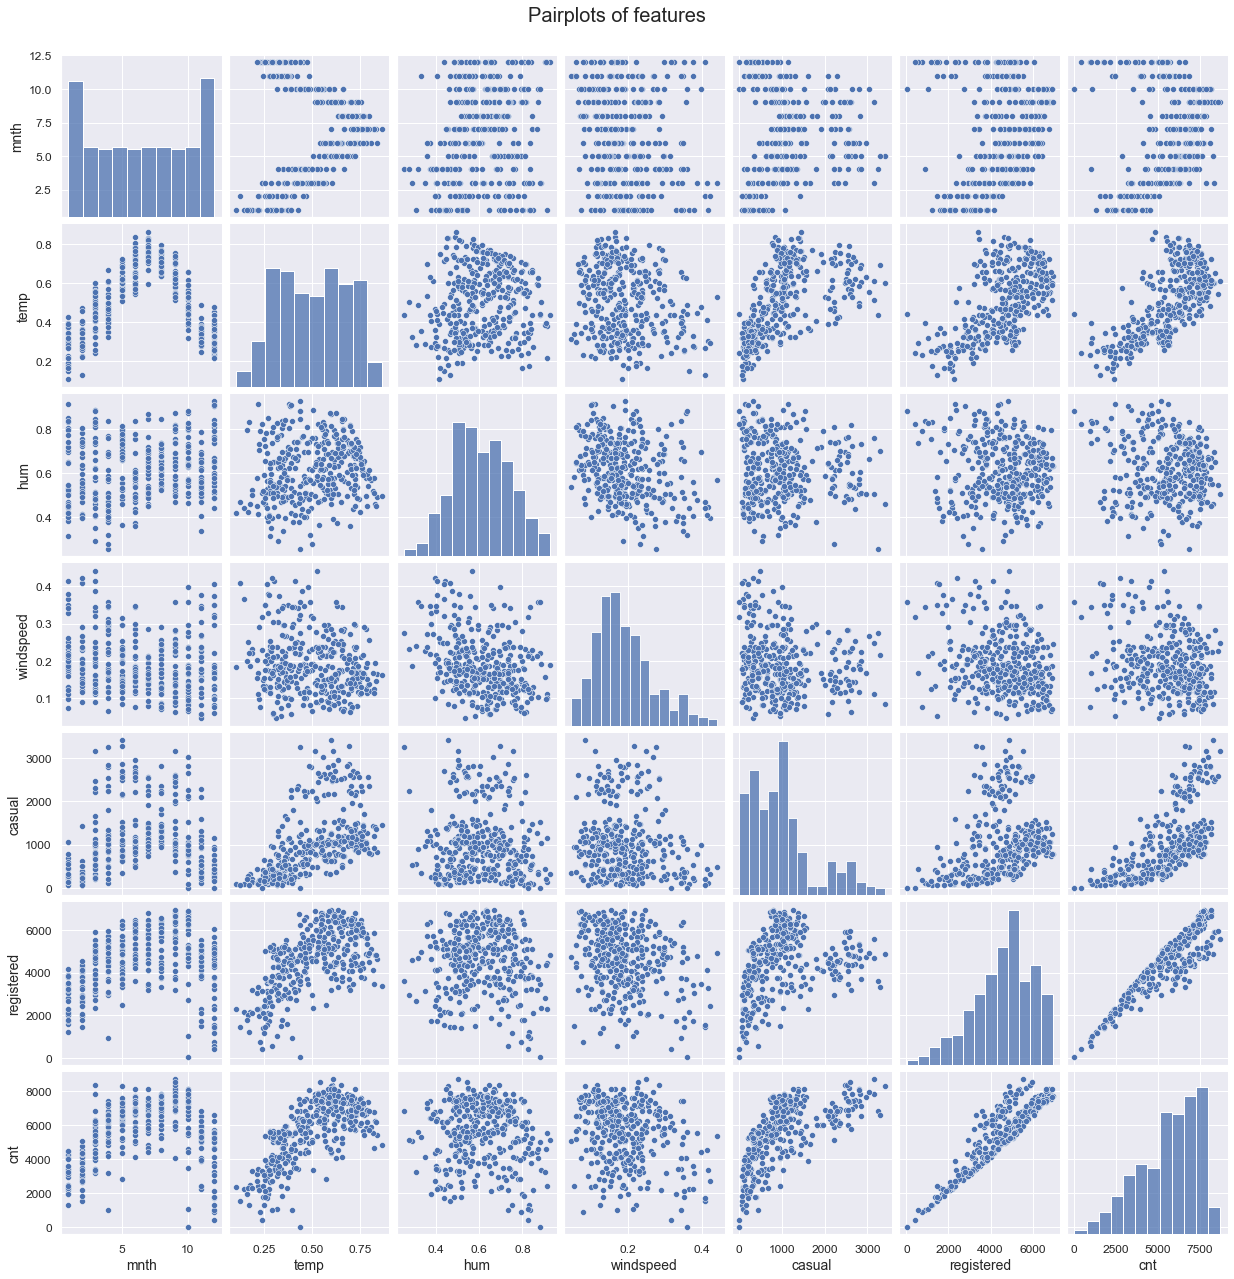

In [50]:
plt.figure(figsize=(20,20))

sns.pairplot(df)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

### Correlation

In [51]:
df.corr()

,mnth,temp,hum,windspeed,casual,registered,cnt
mnth,1.00,0.15,0.20,-0.17,0.10,0.28,0.27
temp,0.15,1.00,0.12,-0.20,0.54,0.61,0.71
hum,0.20,0.12,1.00,-0.29,-0.07,-0.07,-0.09
windspeed,-0.17,-0.20,-0.29,1.00,-0.16,-0.27,-0.28
casual,0.10,0.54,-0.07,-0.16,1.00,0.27,0.64
registered,0.28,0.61,-0.07,-0.27,0.27,1.00,0.91
cnt,0.27,0.71,-0.09,-0.28,0.64,0.91,1.00


In [52]:
df.corr()["cnt"].sort_values()

windspeed    -0.28
hum          -0.09
mnth          0.27
casual        0.64
temp          0.71
registered    0.91
cnt           1.00
Name: cnt, dtype: float64

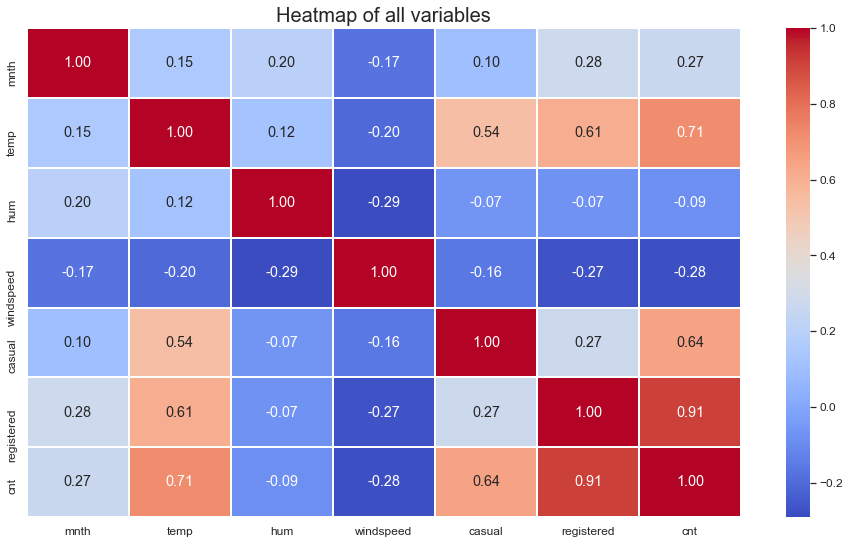

In [53]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Heatmap of all variables", fontsize=20)
plt.show()

### Drop unwanted variables

In [54]:
df.drop(['dteday','casual', 'registered'], axis=1, inplace=True)

In [55]:
df

,season,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,0,1,0.37,0.69,0.19,2294
1,1,1,1,0,1,0.27,0.38,0.33,1951
2,1,1,0,1,1,0.15,0.44,0.37,2236
3,1,1,0,1,2,0.11,0.41,0.18,2368
4,1,1,0,1,1,0.27,0.52,0.13,3272
...,...,...,...,...,...,...,...,...,...
361,1,12,0,1,2,0.25,0.65,0.35,2114
362,1,12,0,1,2,0.25,0.59,0.16,3095
363,1,12,0,0,2,0.25,0.75,0.12,1341
364,1,12,0,0,1,0.26,0.48,0.35,1796


## Regression Analysis

### Linear Regression (StatsModel)

In [56]:
df.columns

Index(['season', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [57]:
y = df[['cnt']]
X = df[['season', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']]

In [58]:
X = sm.add_constant(X)

In [59]:
model = sm.OLS(y,X).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     96.73
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.31e-84
Time:                        19:22:31   Log-Likelihood:                -3048.9
No. Observations:                 366   AIC:                             6116.
Df Residuals:                     357   BIC:                             6151.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3925.8375    382.144     10.273      0.000    3174.301    4677.374
season       619.9355     91.355      6.786      0.000     440.274     799.597
mnth         -63.0390     28.553     -2.208      0.028    -119.193      -6.885
holiday     -878.3874    323.807     -2.713      0.007   -1515.197    -241.578
workingday   199.9583    118.448      1.688      0.092     -32.984     432.901
weathersit  -654.7817    136.324     -4.803      0.000    -922.880    -386.683
temp        5783.5685    335.487     17.239      0.000    5123.789    6443.348
hum        -1610.3229    543.663     -2.962      0.003   -2679.507    -541.139
windspeed  -3192.5775    736.665     -4.334      0.000   -4641.326   -1743.829
==============================================================================
Omnibus:                       38.132   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.335
Skew:                          -0.626   Prob(JB):                     2.39e-15
Kurtosis:                       4.687   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Another method

In [61]:
linreg = smf.ols(formula='cnt ~ C(season) + C(mnth) + C(holiday) + C(workingday) \
                 + C(weathersit) + temp + hum + windspeed', data=df).fit()

In [62]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     56.38
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           7.55e-98
Time:                        19:22:31   Log-Likelihood:                -2987.0
No. Observations:                 366   AIC:                             6018.
Df Residuals:                     344   BIC:                             6104.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3652.5809    394.680      9.255      0.000    2876.291    4428.871
C(season)[T.2]      1284.0778    291.329      4.408      0.000     711.067    1857.089
C(season)[T.3]       633.2783    355.492      1.781      0.076     -65.933    1332.490
C(season)[T.4]      1811.1192    297.619      6.085      0.000    1225.737    2396.501
C(mnth)[T.2]         193.8039    229.495      0.844      0.399    -257.585     645.193
C(mnth)[T.3]         788.3717    273.275      2.885      0.004     250.872    1325.871
C(mnth)[T.4]         204.8293    396.730      0.516      0.606    -575.492     985.150
C(mnth)[T.5]         138.9056    425.812      0.326      0.744    -698.618     976.429
C(mnth)[T.6]         124.6253    435.294      0.286      0.775    -731.548     980.799
C(mnth)[T.7]          52.1820    477.498      0.109      0.913    -887.001     991.365
C(mnth)[T.8]         658.4425    459.710      1.432      0.153    -245.754    1562.639
C(mnth)[T.9]        1276.8957    404.011      3.161      0.002     482.254    2071.538
C(mnth)[T.10]        497.6166    382.411      1.301      0.194    -254.542    1249.775
C(mnth)[T.11]       -351.0630    367.443     -0.955      0.340   -1073.781     371.655
C(mnth)[T.12]       -304.9467    292.470     -1.043      0.298    -880.201     270.307
C(holiday)[T.1]     -753.5334    282.158     -2.671      0.008   -1308.506    -198.561
C(workingday)[T.1]   188.0863    102.550      1.834      0.068     -13.618     389.791
C(weathersit)[T.2]  -542.2187    127.083     -4.267      0.000    -792.177    -292.261
C(weathersit)[T.3] -2407.7460    411.751     -5.848      0.000   -3217.613   -1597.879
temp                5366.9491    736.970      7.282      0.000    3917.415    6816.483
hum                -1933.1661    506.919     -3.814      0.000   -2930.216    -936.116
windspeed          -3470.2450    648.327     -5.353      0.000   -4745.429   -2195.061
==============================================================================
Omnibus:                       53.841   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.403
Skew:                          -0.786   Prob(JB):                     6.44e-25
Kurtosis:                       5.199   Cond. No.                         40.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using p < 0.05; we get certain seasons, certain months, holiday, weathersit, temp, hum and windspeed are statistically significant

### Residual Plots

eval_env: 1


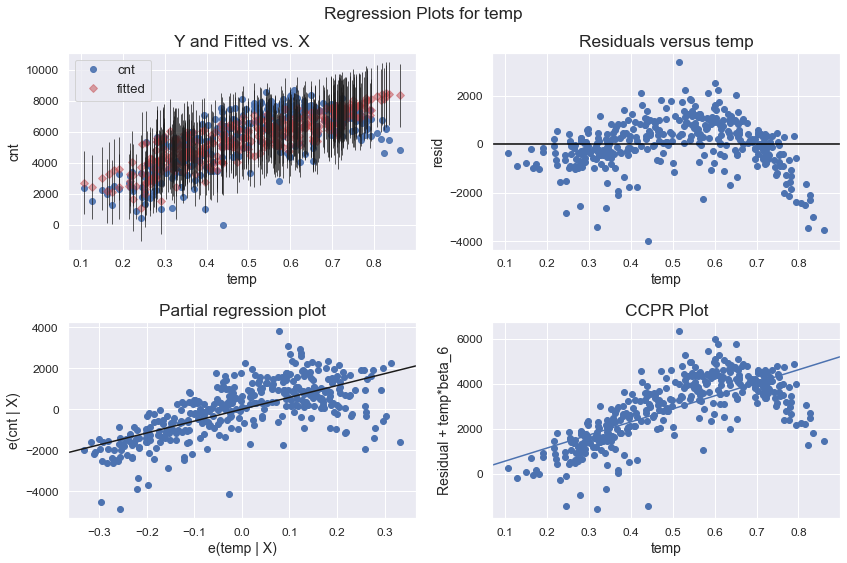

In [63]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'temp', fig=fig)

<Figure size 864x576 with 0 Axes>

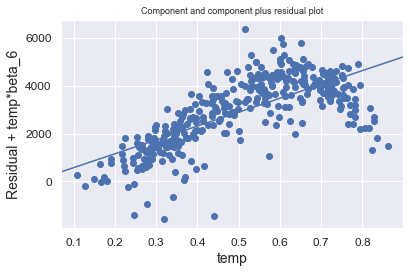

In [64]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(model, "temp")
fig.tight_layout(pad=1.0)

### Linear Regression (SKLearn)

In [65]:
df.head()

,season,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,0,1,0.37,0.69,0.19,2294
1,1,1,1,0,1,0.27,0.38,0.33,1951
2,1,1,0,1,1,0.15,0.44,0.37,2236
3,1,1,0,1,2,0.11,0.41,0.18,2368
4,1,1,0,1,1,0.27,0.52,0.13,3272


In [66]:
df.shape

(366, 9)

In [67]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [68]:
X.values, y.values

(array([[ 1.      ,  1.      ,  0.      , ...,  0.37    ,  0.6925  ,
          0.192167],
        [ 1.      ,  1.      ,  1.      , ...,  0.273043,  0.381304,
          0.329665],
        [ 1.      ,  1.      ,  0.      , ...,  0.15    ,  0.44125 ,
          0.365671],
        ...,
        [ 1.      , 12.      ,  0.      , ...,  0.253333,  0.752917,
          0.124383],
        [ 1.      , 12.      ,  0.      , ...,  0.255833,  0.483333,
          0.350754],
        [ 1.      , 12.      ,  0.      , ...,  0.215833,  0.5775  ,
          0.154846]]),
 array([2294, 1951, 2236, 2368, 3272, 4098, 4521, 3425, 2376, 3598, 2177,
        4097, 3214, 2493, 2311, 2298, 2935, 3376, 3292, 3163, 1301, 1977,
        2432, 4339, 4270, 4075, 3456, 4023, 3243, 3624, 4509, 4579, 3761,
        4151, 2832, 2947, 3784, 4375, 2802, 3830, 3831, 2169, 1529, 3422,
        3922, 4169, 3005, 4154, 4318, 2689, 3129, 3777, 4773, 5062, 3487,
        2732, 3389, 4322, 4363, 1834, 4990, 3194, 4066, 3423, 3333, 3956,
 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292, 8), (74, 8), (292,), (74,))

In [71]:
reg_model = LinearRegression()

In [72]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred = reg_model.predict(X_test)
y_pred

array([5611.32510399, 6549.76337378, 4511.24089949, 3691.20018382,
       5332.60788454, 5649.95063221, 4198.15312053, 4655.10972605,
       7313.47911089, 4565.39332181, 5008.14129666, 5234.97134191,
       6532.09676189, 6114.74923689, 6251.49852728, 7214.41688969,
       6430.95297342, 4846.65262698, 7647.19883509, 5993.72272057,
       5670.70978153, 8026.17358403, 3525.16026804, 6595.98705531,
       4343.49022273, 6873.26477603, 3630.40208116, 5618.41890569,
       3682.45587813, 6824.08240128, 6330.24586182, 5127.41692808,
       2741.22647894, 4668.94092661, 3790.29360216, 4538.41802972,
       4968.30143099, 6078.38306127, 6669.30925525, 3766.74256627,
       7718.58182614, 4789.57761185, 7382.31744903, 5830.87075653,
       2249.82128992, 5375.36467635, 7415.7281567 , 7655.436929  ,
       7408.87968512, 3973.9326009 , 7907.61606986, 7001.46920087,
       7489.05642664, 6105.72633438, 5227.68493237, 3441.03552169,
       4593.00330497, 5546.21566927, 4652.57584412, 4307.26410

In [74]:
mse = mean_squared_error(y_test,y_pred)
mse

1429981.0109256306

In [75]:
rmse = np.sqrt(mse)
rmse

1195.8181345529222

In [76]:
r2score = r2_score(y_test,y_pred)
r2score

0.5982307068591857

#### Python code done by Dennis Lam